# Project Name: Amazon Prime TV Show and Movies

project Type: EDA

Contribution: Individual

Name: Abhijna S Rao

# Project Summary

This project conducts an in-depth analysis of Amazon Prime Video’s U.S. catalog, leveraging a rich dataset of over 9,000 titles and 124,000 cast and crew credits to reveal trends in content diversity, production origins, and audience reception. Utilizing powerful Python tools such as Pandas for data manipulation, NumPy for efficient computations, and Matplotlib and Seaborn for insightful visualizations, the study examines genre popularity, age certifications, release patterns over time, and correlations between IMDb and TMDb ratings and popularity metrics. Additionally, it highlights the most frequent actors and roles, providing a holistic view of the content ecosystem. The findings offer actionable intelligence to guide content acquisition strategies, optimize marketing efforts, and improve recommendation systems—ultimately helping Amazon Prime enhance user engagement, target diverse audience segments more effectively, and maintain a competitive edge in the fast-evolving streaming market.

# GitHub Link


# Problem Statment

With an ever-growing library of shows and movies on Amazon Prime Video, understanding which content resonates most with audiences and how production trends evolve is critical. This project aims to analyze detailed title and credit data to uncover patterns in genre popularity, regional production, audience ratings, and talent contributions, providing actionable insights that can drive smarter content and marketing decisions.


Business Objective:

Leverage data-driven insights to optimize Amazon Prime Video’s content strategy by identifying top-performing genres, key production regions, influential actors, and audience preferences. These insights will help improve content acquisition, tailor recommendations, enhance user engagement, and ultimately support subscription growth and competitive advantage in the streaming industry.

**1.Know Your Data**

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset Loading

In [2]:
df_titles = pd.read_csv("titles.csv")
df_credits = pd.read_csv("credits.csv")

Dataset First View

In [3]:
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
df_titles.drop(['description'], axis = 1, inplace = True)

In [5]:
df_titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [6]:
df_credits

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


Dataset Rows and Column count

In [7]:
print("Number of Rows =",df_titles.shape[0])
print("Number of Columns =",df_credits.shape[1])

Number of Rows = 9871
Number of Columns = 5


Dataset Information

In [8]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   release_year          9871 non-null   int64  
 4   age_certification     3384 non-null   object 
 5   runtime               9871 non-null   int64  
 6   genres                9871 non-null   object 
 7   production_countries  9871 non-null   object 
 8   seasons               1357 non-null   float64
 9   imdb_id               9204 non-null   object 
 10  imdb_score            8850 non-null   float64
 11  imdb_votes            8840 non-null   float64
 12  tmdb_popularity       9324 non-null   float64
 13  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [9]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


Duplicate Values

In [10]:
#checking duplicate values in titles dataset

print("Number of duplicate values in titles dataset=",df_titles.duplicated().sum())

Number of duplicate values in titles dataset= 3


In [11]:
df_titles.drop_duplicates(subset=['title', 'release_year'], inplace=True)


In [12]:
df_titles[df_titles.duplicated()]

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [13]:
#checking duplicate values in credits dataset

print("Number of duplicate values in credits dataset=",df_credits.duplicated().sum())

Number of duplicate values in credits dataset= 56


In [14]:
df_credits.drop_duplicates(inplace=True)

In [15]:
df_credits[df_credits.duplicated()]

,person_id,id,name,character,role


Missing Values/Null Values

In [16]:
#missing value count in title dataset

print("Number of missing values in titles=",df_titles.isna().sum().sum())

Number of missing values in titles= 20319


In [17]:
#missing value count in credits dataset

print("Number of missing values in credits=",df_credits.isna().sum().sum())

Number of missing values in credits= 16277


Visualizing the missing values

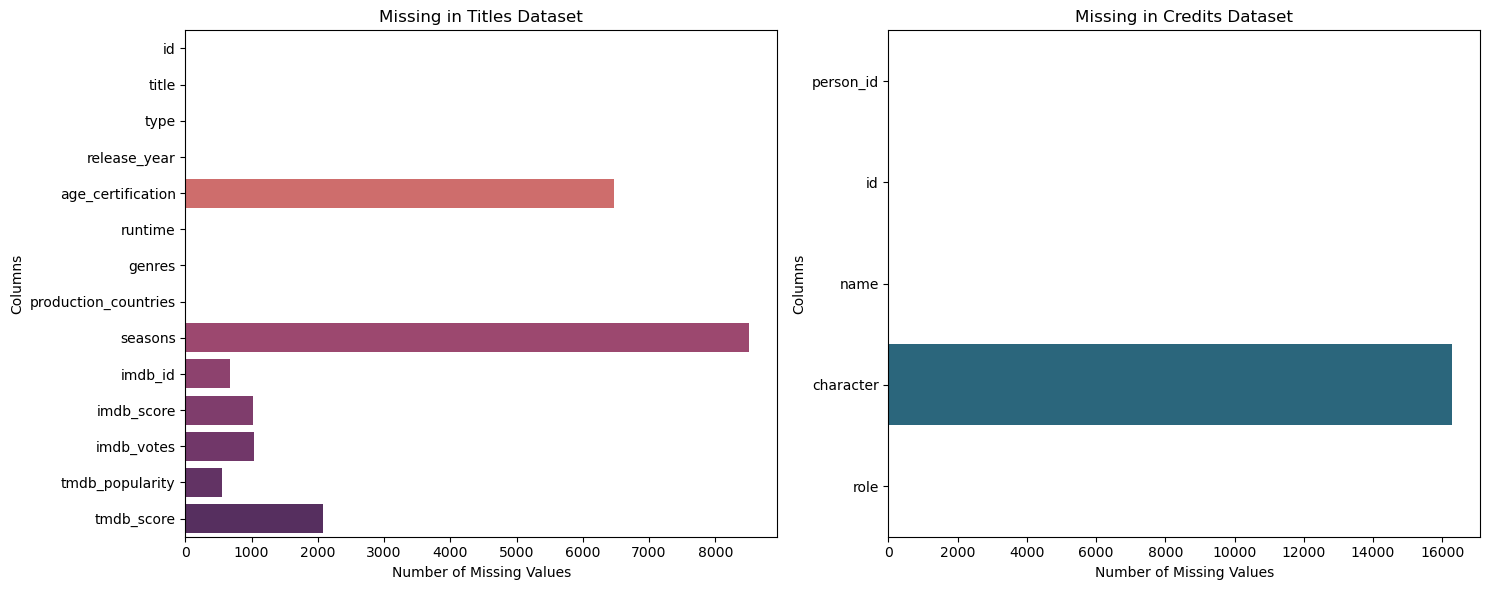

In [18]:
missing_titles= df_titles.isnull().sum()
missing_credits= df_credits.isnull().sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Titles missing values
sns.barplot(x=missing_titles.values, y=missing_titles.index, ax=axes[0], palette='flare')
axes[0].set_title("Missing in Titles Dataset")
axes[0].set_xlabel("Number of Missing Values")
axes[0].set_ylabel("Columns")

# Credits missing values
sns.barplot(x=missing_credits.values, y=missing_credits.index, ax=axes[1], palette='crest')
axes[1].set_title("Missing in Credits Dataset")
axes[1].set_xlabel("Number of Missing Values")
axes[1].set_ylabel("Columns")

plt.tight_layout()
plt.show()


**What did you know about your datasets**

This project uses two datasets from Amazon Prime Video (US). The titles.csv file contains metadata for over 9,000 shows and movies, including information like title name, type, release year, genres, runtime, and audience ratings (IMDb, TMDB). The credits.csv file has over 124,000 records of cast and crew, detailing the actors and directors involved in each title.Both datasets can be linked using the id column for combined analysis. Some missing values exist, particularly in ratings and character names. Together, these datasets enable insights into content trends, audience preferences, and the impact of actors and directors on a title’s success.

**2. Understanding Your Variables**

In [19]:
#Dataset Columns
df_titles.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [20]:
df_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [21]:
#Dataset Describe

df_titles.describe(include= "all")

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9860,9860,9860,9860.000000,3383,9860.000000,9860,9860,1355.000000,9194,8841.000000,8.831000e+03,9314.000000,7783.000000
unique,9860,9737,2,NaN,11,NaN,2026,497,NaN,9194,NaN,NaN,NaN,NaN
top,ts20945,Little Men,MOVIE,NaN,R,NaN,['drama'],['US'],NaN,tt0850645,NaN,NaN,NaN,NaN
freq,1,3,8505,NaN,1249,NaN,906,4803,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2001.342596,NaN,85.946045,NaN,NaN,2.794096,NaN,5.976518,8.541890e+03,6.915848,5.984736
std,NaN,NaN,NaN,25.790885,NaN,33.394720,NaN,NaN,4.151449,NaN,1.344291,4.594281e+04,30.019640,1.517504
min,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,NaN,NaN,NaN,1996.000000,NaN,65.000000,NaN,NaN,1.000000,NaN,5.100000,1.175000e+02,1.234250,5.100000
50%,NaN,NaN,NaN,2014.000000,NaN,89.000000,NaN,NaN,1.000000,NaN,6.100000,4.640000e+02,2.538000,6.000000
75%,NaN,NaN,NaN,2018.000000,NaN,102.000000,NaN,NaN,3.000000,NaN,6.900000,2.238500e+03,5.642250,6.900000


In [22]:
df_credits.describe(include= "all")

,person_id,id,name,character,role
count,1.241790e+05,124179,124179,107902,124179
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115793
mean,4.065843e+05,NaN,NaN,NaN,NaN
std,5.617204e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.898850e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712810e+05,NaN,NaN,NaN,NaN


**Variable Description**

#variable description of both titles and credits data

**1.id:** Unique identifier for the title (matches with credits.csv)

**2.title:** Name of the movie or TV show

**3.show_type:** Whether the content is a "MOVIE" or "SHOW"

**4.release_year:** The year the movie/show was released 

**5.age_certification:** Age rating like "PG-13", "R", etc.

**6.runtime:** Duration of the movie or average length per episode (in minutes)

**7.genres:** List of genres, often comma-separated (e.g., Action, Comedy)

**8.production_countries:** Countries that produced the title

**9.seasons:** Number of seasons (only applicable to TV shows)

**10.imdb_id:** Unique ID of the title on IMDb

**11.imdb_score:** IMDb rating (0–10 scale)

**12.imdb_votes:** Number of votes the title has received on IMDb

**13.tmdb_popularity:** Popularity score from TMDB (The Movie Database)

**14.tmdb_score:** TMDB user rating score (0–10 scale)

**15.person_id:** Unique ID of the person (actor or director)

**16.id:** Title ID from titles.csv (used to join with title info)

**17.name:** Name of the actor or director

**18.character_name:** Name of the character portrayed (if role is ACTOR)

**19.role:** Either "ACTOR" or "DIRECTOR"

Check Unique Values for each variable

In [23]:
#unique values in titles 
for col in df_titles.columns:
    print(f" No.of unique value in {col}: {df_titles[col].nunique()}")

 No.of unique value in id: 9860
 No.of unique value in title: 9737
 No.of unique value in type: 2
 No.of unique value in release_year: 110
 No.of unique value in age_certification: 11
 No.of unique value in runtime: 206
 No.of unique value in genres: 2026
 No.of unique value in production_countries: 497
 No.of unique value in seasons: 32
 No.of unique value in imdb_id: 9194
 No.of unique value in imdb_score: 86
 No.of unique value in imdb_votes: 3648
 No.of unique value in tmdb_popularity: 5325
 No.of unique value in tmdb_score: 89


In [24]:
#unique values in credits

for col in df_credits.columns:
    print(f" No.of unique value in {col}: {df_credits[col].nunique()}")

 No.of unique value in person_id: 80508
 No.of unique value in id: 8861
 No.of unique value in name: 79758
 No.of unique value in character: 71097
 No.of unique value in role: 2


**3. Data Wrangling**

In [25]:
#Filling missing values of titles

df_titles['seasons'].fillna('0', inplace=True)
df_titles['age_certification'].fillna('Unknown', inplace=True)
df_titles['imdb_score'].fillna(df_titles['imdb_score'].mean(), inplace=True)
df_titles['tmdb_popularity'].fillna(df_titles['tmdb_popularity'].mode()[0], inplace=True)
df_titles['tmdb_score'].fillna(df_titles['tmdb_score'].mean(), inplace=True)
df_titles['imdb_votes'].fillna(df_titles['imdb_votes'].mean(), inplace=True)

In [26]:
df_titles['tmdb_popularity'] = df_titles['tmdb_popularity'].round(1)

In [27]:
df_titles.drop(columns=["imdb_id"], inplace=True)

In [28]:
#Filling missing values of credits

df_credits['character'].fillna("Unknown",inplace=True)

In [29]:
# Round all numeric columns in the DataFrame to 1 decimal place

df_titles['imdb_votes']  = df_titles['imdb_votes'].round(1)

# For each specified column, extract the first item and clean brackets and quotes

columns_to_clean = ['production_countries', 'genres']  # replace with your actual column names
for col in columns_to_clean:
    df_titles[col] = df_titles[col].apply(
        lambda x: x.split(",")[0].strip("[]").replace("'", "") if isinstance(x, str) else x
    )

In [30]:
df_titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.6
1,tm19248,The General,MOVIE,1926,Unknown,78,action,US,0,8.2,89766.0,8.6,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,1946,Unknown,171,romance,US,0,8.1,63026.0,8.4,7.8
3,tm83884,His Girl Friday,MOVIE,1940,Unknown,92,comedy,US,0,7.8,57835.0,11.3,7.4
4,tm56584,In a Lonely Place,MOVIE,1950,Unknown,94,thriller,US,0,7.9,30924.0,8.3,7.6


In [31]:
df_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [32]:
# Each genre in its own row
titles_exploded = df_titles.explode('genres')

In [33]:
unique_genres = sorted(titles_exploded['genres'].dropna().unique())
print(unique_genres)

['', 'action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']


In [34]:
genre_counts = titles_exploded['genres'].value_counts()
print(genre_counts)

drama            2623
comedy           1606
thriller         1100
documentation     776
horror            610
action            527
romance           492
western           412
scifi             325
crime             299
animation         232
                  209
fantasy           198
family            134
reality           102
music              93
war                51
history            46
sport              19
european            6
Name: genres, dtype: int64


In [35]:
merged_df= pd.merge(df_titles, df_credits, on="id")

In [36]:
merged_df

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.600000,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.600000,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.600000,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,Unknown,78,action,US,0,8.2,89766.0,8.6,8.000000,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,Unknown,78,action,US,0,8.2,89766.0,8.6,8.000000,28713,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124034,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,1938589,Sangam Shukla,Madhav,ACTOR
124035,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
124036,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,728899,Vanya Wellens,Budhiya,ACTOR
124037,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,1938620,Vishwa Bhanu,Gissu,ACTOR


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124039 entries, 0 to 124038
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124039 non-null  object 
 1   title                 124039 non-null  object 
 2   type                  124039 non-null  object 
 3   release_year          124039 non-null  int64  
 4   age_certification     124039 non-null  object 
 5   runtime               124039 non-null  int64  
 6   genres                124039 non-null  object 
 7   production_countries  124039 non-null  object 
 8   seasons               124039 non-null  object 
 9   imdb_score            124039 non-null  float64
 10  imdb_votes            124039 non-null  float64
 11  tmdb_popularity       124039 non-null  float64
 12  tmdb_score            124039 non-null  float64
 13  person_id             124039 non-null  int64  
 14  name                  124039 non-null  object 
 15  

In [38]:
merged_df.describe(include= "all")

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
count,124039,124039,124039,124039.000000,124039,124039.000000,124039,124039,124039,124039.000000,1.240390e+05,124039.000000,124039.000000,1.240390e+05,124039,124039,124039
unique,8855,8747,2,NaN,12,NaN,20,102,31,NaN,NaN,NaN,NaN,NaN,79719,71038,2
top,tm458582,Coming 2 America,MOVIE,NaN,Unknown,NaN,drama,US,0,NaN,NaN,NaN,NaN,NaN,George 'Gabby' Hayes,Unknown,ACTOR
freq,137,137,115889,NaN,67340,NaN,36653,72721,115889,NaN,NaN,NaN,NaN,NaN,49,16255,115658
mean,NaN,NaN,NaN,1996.330227,NaN,95.418352,NaN,NaN,NaN,5.969187,2.257891e+04,10.187105,5.992441,4.066260e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,27.731844,NaN,29.656881,NaN,NaN,NaN,1.211929,8.637334e+04,40.783760,1.265048,5.616693e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,NaN,1.100000,5.000000e+00,0.000000,0.800000,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,1983.000000,NaN,83.000000,NaN,NaN,NaN,5.300000,3.160000e+02,1.900000,5.400000,3.896550e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,2009.000000,NaN,93.000000,NaN,NaN,NaN,6.000000,1.477000e+03,3.900000,6.000000,1.339020e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,2017.000000,NaN,109.000000,NaN,NaN,NaN,6.800000,8.541900e+03,8.800000,6.800000,5.714655e+05,NaN,NaN,NaN


In [39]:
merged_df.isnull().sum().sort_values(ascending=False)

id                      0
imdb_score              0
character               0
name                    0
person_id               0
tmdb_score              0
tmdb_popularity         0
imdb_votes              0
seasons                 0
title                   0
production_countries    0
genres                  0
runtime                 0
age_certification       0
release_year            0
type                    0
role                    0
dtype: int64

In [40]:
merged_df[merged_df.duplicated()]

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role


In [41]:
merged_df

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.600000,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.600000,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,comedy,US,26.0,8.6,1092.0,15.4,7.600000,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,Unknown,78,action,US,0,8.2,89766.0,8.6,8.000000,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,Unknown,78,action,US,0,8.2,89766.0,8.6,8.000000,28713,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124034,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,1938589,Sangam Shukla,Madhav,ACTOR
124035,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
124036,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,728899,Vanya Wellens,Budhiya,ACTOR
124037,tm1054116,Baikunth,MOVIE,2021,Unknown,72,family,,0,8.4,49.0,0.6,5.984736,1938620,Vishwa Bhanu,Gissu,ACTOR


**What all manipulations have you done and insights you found?**

**Manipulations:**

**1. Handling Missing Values**

- Filled missing values in in columns like description, age_certification, seasons, character, imdb_score, tmdb_popularity, tmdb_score, imdb_votes with appropriate placeholders or removed them where necessary.

- imdb_score, tmdb_score had their missing values filled using the mean of their respective columns, which helps maintain the overall rating distribution and ensures these fields can be used reliably in statistical analysis or visualizations. 

- imdb_voteshad its missing values filled with the mean to avoid disrupting aggregate calculations.

- tmdb_popularity was filled using the mode—the most common value in the column—to better reflect the central tendency in popularity data.

**2. Rounding Numeric Values in a DataFrame Column**
- reduces their decimal precision, simplifying the data by limiting digits after the decimal point. This makes numbers easier to read and compare, though it slightly changes the exact values.

**3. Extracting the First Item from List-like String Columns in a DataFrame**
-  simplified value per cell. This reduced complexity and made the data easier to analyze but also removed information about additional items originally present.

**4. Performed Value Counts for Each Genre**
- This transformed the dataset’s structure from nested or grouped values into a flat, row-wise format, making it easier to analyze and count each genre individually.

**5. Merged two csv file**
- combined datasets by matching values based on "id", for easier analysis.

**6. Cleaned Merged data**
- handled null values and checked for duplicates values, enabling more accurate genre-wise analysis.

**Insights:**

1.Handled missing values to ensure data completeness and consistency.

2.Used mean/mode imputation to maintain score and popularity trends.

3.Rounded numeric values for easier reading and cleaner visualizations.

4.Extracted first items from list-like strings to simplify analysis.

5.Counted genre frequency to identify popular and rare genres.

6.Merged datasets to enrich information for deeper insights.

7.Cleaned merged data to improve accuracy and remove duplicates.

**4.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Univariate Analysis**

chart 1. Count of TV vs Movies

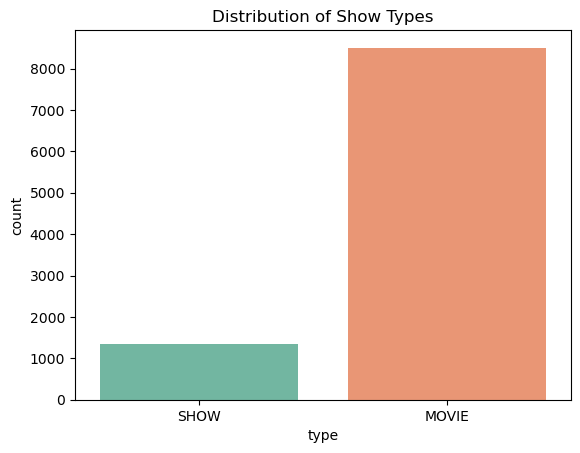

In [42]:
sns.countplot(data=df_titles, x='type', palette='Set2')
plt.title('Distribution of Show Types')
plt.show()

**1. Why did you pick the specific chart?**

Countplot clearly shows the frequency distribution of categorical data (show types)

**2. What is/are the insight(s) found from the chart?**

It reveals which show type (e.g., Movie or TV Show) is more common or less represented.

**3. Will the gained insights help creating a positive business impact?**

Yes, it helps guide content strategy by identifying gaps or focus areas to improve user satisfaction and engagement.

Chart 2. Histogram of IMDb Scores

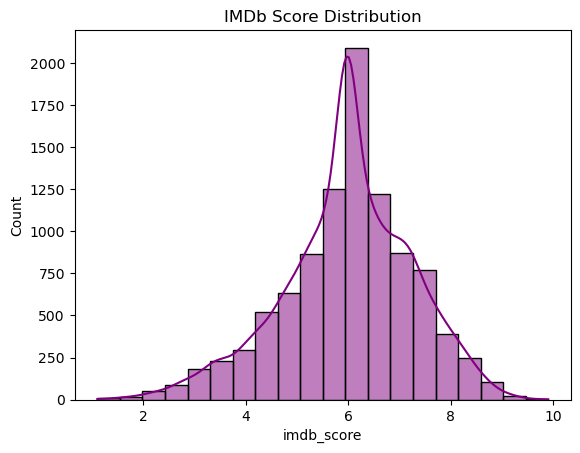

In [43]:
sns.histplot(df_titles['imdb_score'].dropna(), bins=20, kde=True, color='purple')
plt.title('IMDb Score Distribution')
plt.show()

**1. Why did you pick the specific chart?**

Histogram with KDE shows the distribution and density of IMDb scores, revealing how scores spread across the dataset.

**2. What is/are the insight(s) found from the chart?**

You can see if scores cluster around certain values (e.g., mostly high or low ratings) and identify patterns like skewness or peaks.

**3. Will the gained insights help creating a positive business impact?**

Yes, understanding score distribution helps in content quality assessment and can guide decisions on what types of shows to promote or acquire.

chart 3. Country Distribution

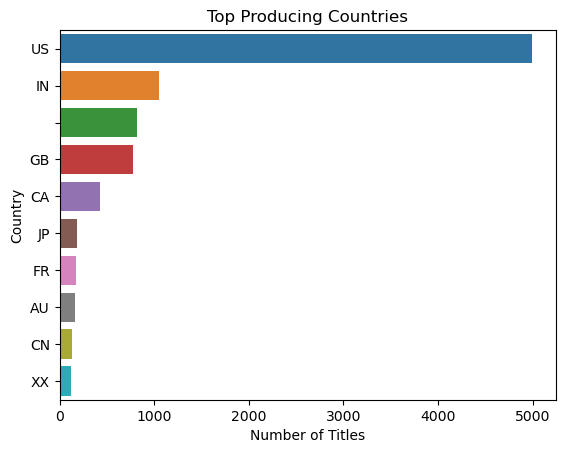

In [44]:
df_titles['production_countries'] = df_titles['production_countries'].astype(str)
countries = df_titles['production_countries'].str.split(',').explode()
top_countries = countries.value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

**1. Why did you pick the specific chart?**

Barplot effectively displays the top producing countries by the number of titles, allowing easy comparison.

**2. What is/are the insight(s) found from the chart?**

Shows which countries produce the most content, revealing key production hubs.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps identify strong production markets and potential regions for partnerships or expansion.

chart 4. Top Genres by Count

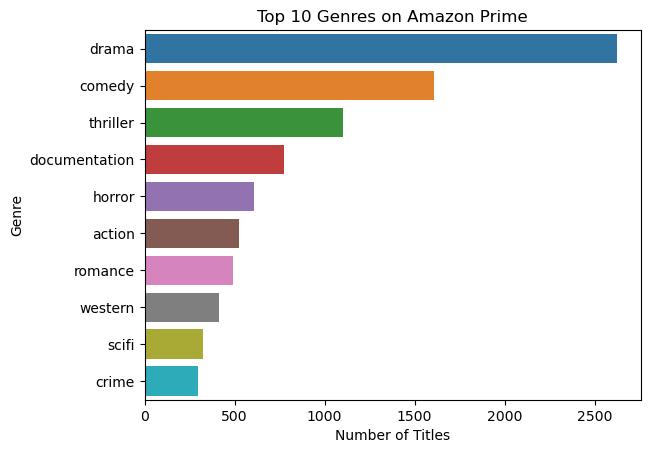

In [45]:
df_titles['genres'] = df_titles['genres'].astype(str)
genres_split = df_titles['genres'].str.split(',').explode()
top_genres = genres_split.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

**1. Why did you pick the specific chart?**

Barplot clearly ranks and compares the top genres by title count for easy interpretation.

**2. What is/are the insight(s) found from the chart?**

Highlights the most common genres available on Amazon Prime, showing content trends.

**3. Will the gained insights help creating a positive business impact?**

Yes, it helps tailor content acquisition and marketing to popular genres, improving viewer engagement.

chart 5. Most Common Roles

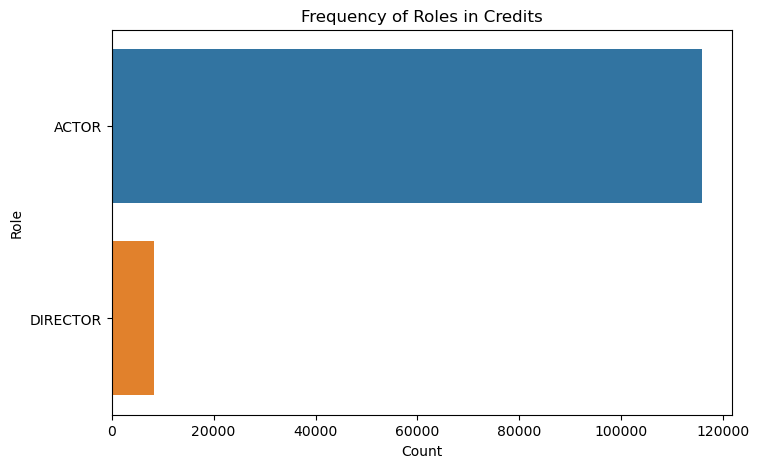

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_credits, y='role', order=df_credits['role'].value_counts().index)
plt.title("Frequency of Roles in Credits")
plt.xlabel("Count")
plt.ylabel("Role")
plt.show()

**1. Why did you pick the specific chart?**

Countplot shows the frequency of different roles clearly and ranks them for easy comparison.

**2. What is/are the insight(s) found from the chart?**

Identifies the most common roles in the credits, revealing key contributors in productions.

**3. Will the gained insights help creating a positive business impact?**

Yes, understanding role distribution can help optimize casting and production planning.

**Bivariate Analysis**

chart 6. Release Year vs Number of Titles

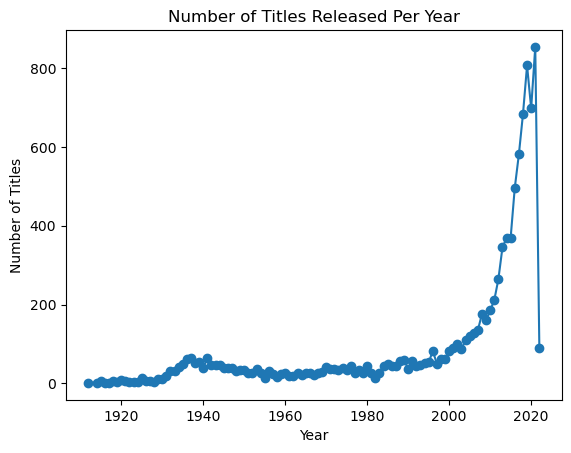

In [47]:
titles_per_year = df_titles['release_year'].value_counts().sort_index()
titles_per_year.plot(kind='line', marker='o')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

**1. Why did you pick the specific chart?**

Line chart shows trends over time, making it easy to see how the number of titles released changes year by year.

**2. What is/are the insight(s) found from the chart?**

Reveals growth or decline patterns in content production across years.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps understand production trends and plan for future content investments or marketing pushes.

chart 7. Average IMDb Score by Genre

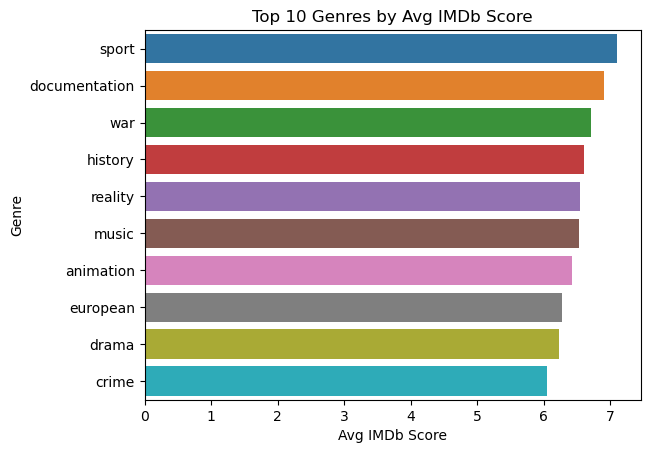

In [48]:
genre_scores = df_titles[['genres', 'imdb_score']].dropna()
genre_scores = genre_scores.assign(genres=genre_scores['genres'].str.split(',')).explode('genres')
avg_scores = genre_scores.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_scores.values, y=avg_scores.index)
plt.title("Top 10 Genres by Avg IMDb Score")
plt.xlabel("Avg IMDb Score")
plt.ylabel("Genre")
plt.show()

**1. Why did you pick the specific chart?**

Barplot clearly shows the top genres ranked by average IMDb score for easy comparison.

**2. What is/are the insight(s) found from the chart?**

Identifies genres with the highest average ratings, indicating perceived quality or audience preference.

**3. Will the gained insights help creating a positive business impact?**

Yes, it helps prioritize content investment and marketing on high-quality genres to boost viewer satisfaction.

chart 8. Number of People per Role per Movie

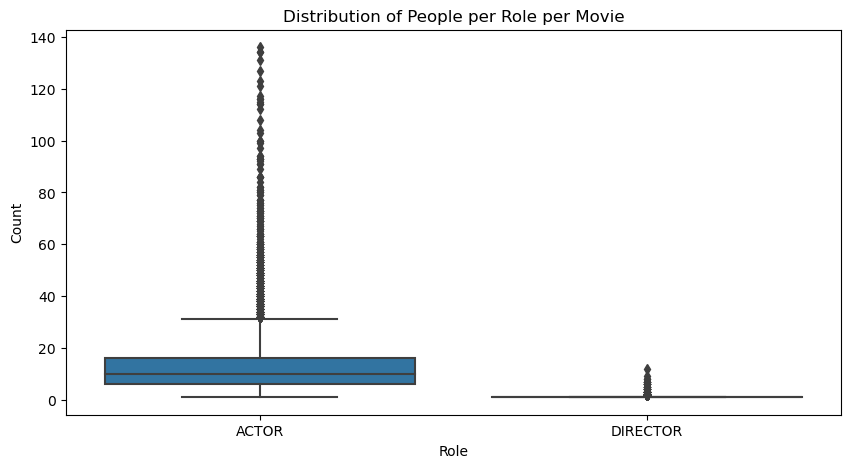

In [49]:
role_count = df_credits.groupby(['id', 'role']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.boxplot(data=role_count, x='role', y='count')
plt.title("Distribution of People per Role per Movie")
plt.xlabel("Role")
plt.ylabel("Count")
plt.show()

**1. Why did you pick the specific chart?**

Boxplot shows the spread and variation in the number of people per role across movies.

**2. What is/are the insight(s) found from the chart?**

Highlights which roles typically have many or few people involved and the variability between titles.

**3. Will the gained insights help creating a positive business impact?**

Yes, it can guide resource allocation and budgeting by understanding typical team sizes for each role.

chart 9. Most Frequent Role per Character

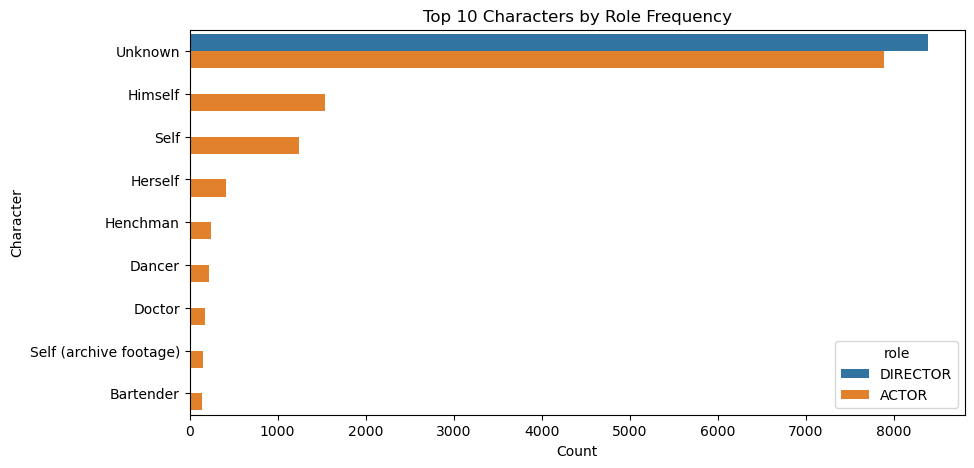

In [50]:
char_role = df_credits.groupby(['character', 'role']).size().reset_index(name='count')
top_char_roles = char_role.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_char_roles, x='count', y='character', hue='role')
plt.title("Top 10 Characters by Role Frequency")
plt.xlabel("Count")
plt.ylabel("Character")
plt.show()

**1. Why did you pick the specific chart?**

Barplot with hue shows the top characters by how often they appear, split by role for deeper insight.

**2. What is/are the insight(s) found from the chart?**

Identifies which characters are most frequently credited and their associated roles.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps understand popular characters and their roles, useful for casting decisions and marketing.

chart 10. Top 10 Actors by IMDb Average Score

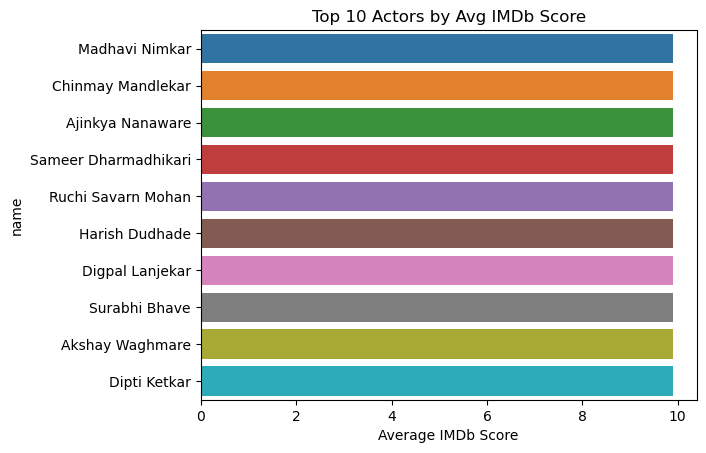

In [51]:
actor_scores = merged_df.groupby('name')['imdb_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=actor_scores.values, y=actor_scores.index)
plt.title('Top 10 Actors by Avg IMDb Score')
plt.xlabel('Average IMDb Score')
plt.show()

**1. Why did you pick the specific chart?**

Barplot effectively ranks actors by their average IMDb score for easy comparison.

**2. What is/are the insight(s) found from the chart?**

Highlights actors associated with higher-rated titles, indicating their impact on content quality.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps in casting decisions and marketing by focusing on actors linked to well-rated shows or movies.

**Multivariate Analysis**

chart 11. Heatmap of Correlations

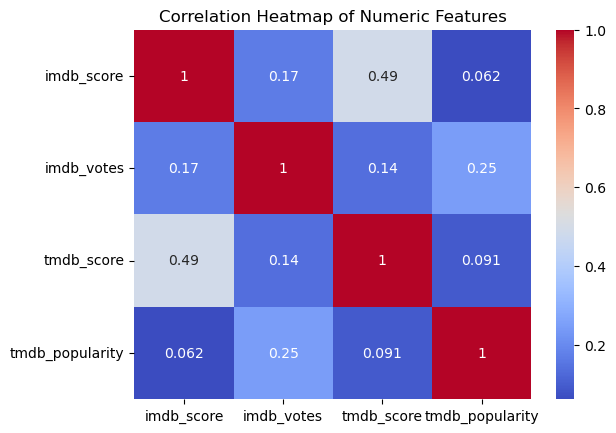

In [52]:
numeric_cols = ['imdb_score', 'imdb_votes', 'tmdb_score', 'tmdb_popularity']
sns.heatmap(df_titles[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**1. Why did you pick the specific chart?**

Heatmap clearly shows correlation strengths between numeric features at a glance.

**2. What is/are the insight(s) found from the chart?**

Identifies which features are strongly related (e.g., IMDb score vs. votes), guiding feature importance.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps focus on key metrics for predicting success and improving recommendation systems.

chart 12. IMDb Score by Show Type and Age Certification

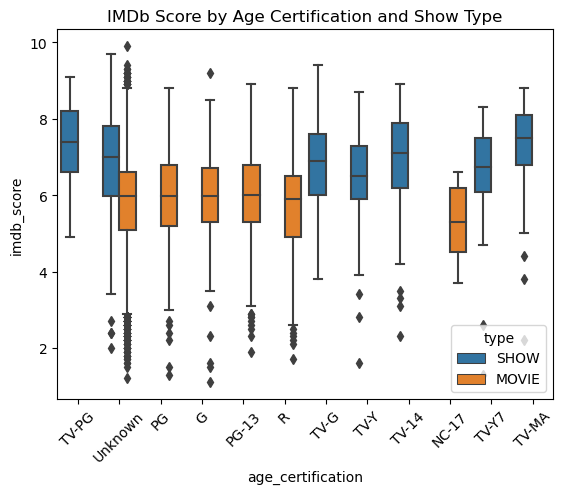

In [53]:
sns.boxplot(data=df_titles, x='age_certification', y='imdb_score', hue='type')
plt.title('IMDb Score by Age Certification and Show Type')
plt.xticks(rotation=45)
plt.show()

**1. Why did you pick the specific chart?**

Boxplot with hue compares IMDb score distributions across age certifications and show types together.

**2. What is/are the insight(s) found from the chart?** 

Shows how ratings vary by age group within each show type, highlighting nuanced quality differences.

**3. Will the gained insights help creating a positive business impact?**

Yes, understanding these relationships helps improve rating predictions and tailor content recommendations.

chart 13. Top Actors by Number of Appearances Across Movies and Roles

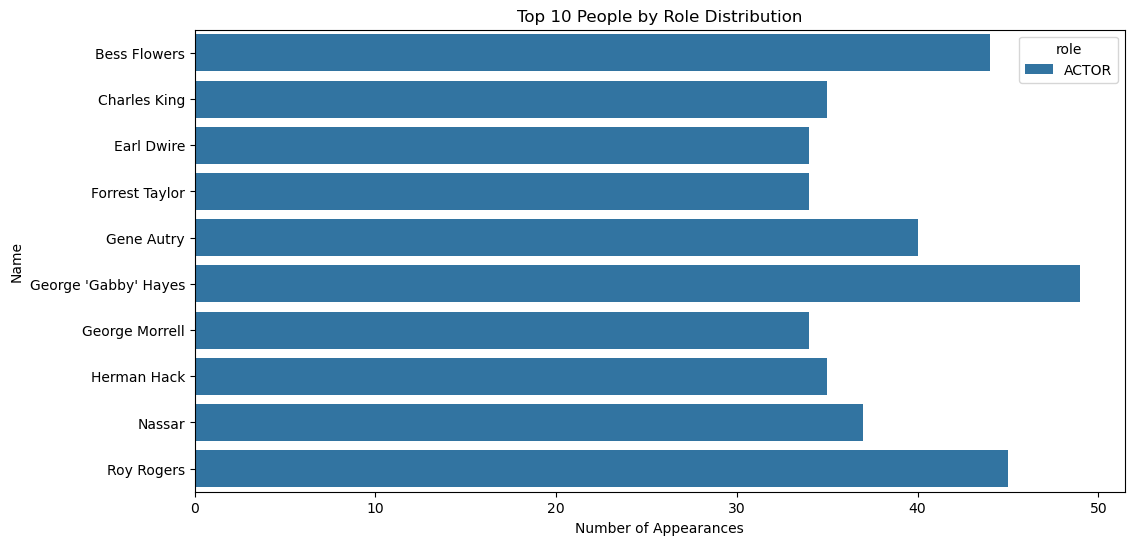

In [54]:
actor_counts = df_credits[df_credits['role'] == 'ACTOR']
top_actors = actor_counts['name'].value_counts().head(10)

actor_roles = df_credits[df_credits['name'].isin(top_actors.index)]
actor_summary = actor_roles.groupby(['name', 'role']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=actor_summary, x='count', y='name', hue='role')
plt.title("Top 10 People by Role Distribution")
plt.xlabel("Number of Appearances")
plt.ylabel("Name")
plt.show()

**1. Why did you pick the specific chart?**

Barplot with hue shows the role distribution of the top 10 most-credited actors, giving both quantity and role diversity.

**2. What is/are the insight(s) found from the chart?**

Reveals not only the most frequently appearing individuals but also their involvement across different roles.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps identify versatile and high-visibility talent, useful for casting, partnerships, and audience targeting.

chart 14.  IMDb Votes vs TMDB Popularity by Role

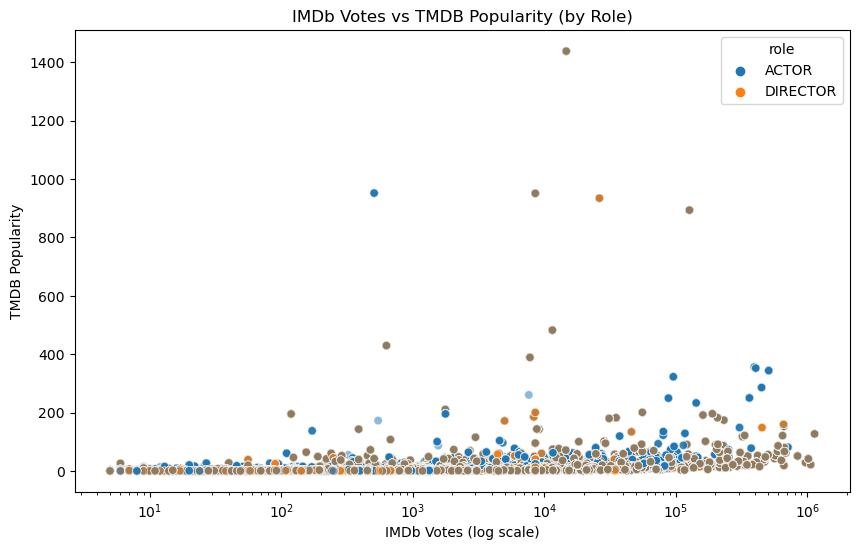

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='imdb_votes', y='tmdb_popularity', hue='role', alpha=0.5)
plt.xscale('log')
plt.title('IMDb Votes vs TMDB Popularity (by Role)')
plt.xlabel('IMDb Votes (log scale)')
plt.ylabel('TMDB Popularity')
plt.show()

**1. Why did you pick the specific chart?**

Scatterplot visualizes the relationship between IMDb votes and TMDB popularity, with roles distinguished by color for deeper insight.

**2. What is/are the insight(s) found from the chart?**

Shows how popularity and vote counts relate across different roles; log scale reveals trends across wide vote ranges.

**3. Will the gained insights help creating a positive business impact?**

Yes, helps identify which roles are tied to more popular or high-engagement content, guiding talent and marketing strategies.

**5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?

To help the client achieve their business objectives, I suggest the following data-driven strategies:

**1.Content Acquisition & Production:**

Focus on acquiring and producing content in the top-performing genres (e.g., Drama, Comedy, Action) and from leading production countries identified in the analysis. Prioritize titles with higher average IMDb and TMDb scores to ensure quality offerings that attract and retain viewers.

**2.Talent Management:**

Collaborate with top-rated actors and directors who consistently appear in highly rated titles to boost content appeal. Use role distribution insights to efficiently allocate casting and crew resources.

**3.Audience Segmentation & Personalization:**

Tailor content recommendations and marketing campaigns based on age certification and show type preferences revealed by the data. This helps increase viewer engagement by delivering more relevant content to specific audience segments.

**4.Trend Monitoring & Catalog Planning:**

Track content release trends over time to optimize timing for new releases, balancing fresh content with popular classics. This ensures a dynamic and engaging catalog that keeps subscribers interested.

**5.Enhance Recommendation Algorithms:**

Incorporate correlations between IMDb votes, TMDb popularity, and ratings into recommendation systems to better predict and suggest content that users are likely to enjoy, improving user satisfaction and watch time.

# Conclusion

This analysis of Amazon Prime Video’s content and credits dataset provides valuable insights into genre popularity, production origins, audience preferences, and talent impact. By leveraging these data-driven findings, the platform can optimize its content acquisition, tailor recommendations to diverse viewer segments, and strategically plan future releases. Implementing these recommendations will enhance user engagement, improve content quality, and drive subscription growth—helping Amazon Prime maintain a strong competitive edge in the dynamic streaming industry.
